In [1]:
import numpy as np
import pandas as pd

In [2]:
whiskies = pd.read_csv('whiskies.txt')
regions = pd.read_csv('regions.txt')

In [9]:
whiskies['Regions'] = regions

In [11]:
whiskies.tail()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Regions
81,82,Tobermory,1,1,1,0,0,1,0,0,1,2,2,2,PA75 6NR,150450,755070,Islands
82,83,Tomatin,2,3,2,0,0,2,2,1,1,2,0,1,IV13 7YT,279120,829630,Highlands
83,84,Tomintoul,0,3,1,0,0,2,2,1,1,2,1,2,AB37 9AQ,315100,825560,Speyside
84,85,Tormore,2,2,1,0,0,1,0,1,2,1,0,0,PH26 3LR,315180,834960,Speyside
85,86,Tullibardine,2,3,0,0,1,0,2,1,1,2,2,1,PH4 1QG,289690,708850,Highlands


In [14]:
whiskies.columns

Index(['RowID', 'Distillery', 'Body', 'Sweetness', 'Smoky', 'Medicinal',
       'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity',
       'Floral', 'Postcode', ' Latitude', ' Longitude', 'Regions'],
      dtype='object')

In [17]:
flavors = whiskies.iloc[:,2:14]

In [21]:
# Compute Pearson Correlation coefficient
corr_flavors = pd.DataFrame.corr(flavors)

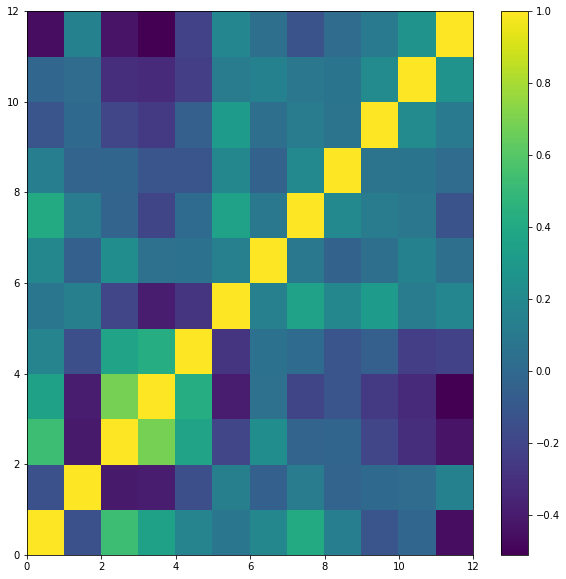

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.pcolor(corr_flavors)
plt.colorbar()
plt.savefig('flavor_correlations.pdf')

In [25]:
corr_whiskey = pd.DataFrame.corr(flavors.transpose())

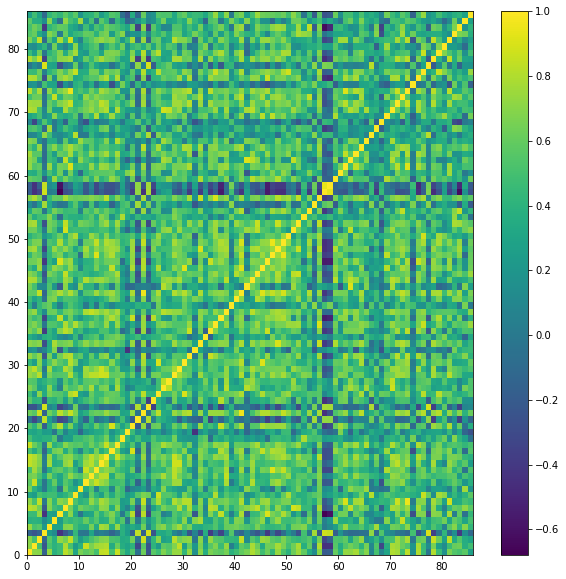

In [31]:
plt.figure(figsize=(10,10))
plt.pcolor(corr_whiskey)
plt.axis('tight')
plt.colorbar();

In [33]:
whiskies.Regions.value_counts()

Speyside        43
Highlands       25
Islay            7
Islands          6
Lowlands         3
Campbelltown     2
Name: Regions, dtype: int64

In [36]:
# Using Spectral Coclustering for classification 
from sklearn.cluster.bicluster import SpectralCoclustering
model = SpectralCoclustering(n_clusters=6,random_state=0)
model.fit(corr_whiskey)

SpectralCoclustering(init='k-means++', mini_batch=False, n_clusters=6,
           n_init=10, n_jobs=1, n_svd_vecs=None, random_state=0,
           svd_method='randomized')

In [40]:
np.sum(model.rows_,axis=1)

array([20,  5, 19, 17,  6, 19])

In [44]:
# Append the predicted clusters to whiskey data:
whiskies['Group'] = pd.Series(model.row_labels_,index = whiskies.index)
whiskies = whiskies.iloc[np.argsort(model.row_labels_)]    #sorting in ascending order
whiskies = whiskies.reset_index(drop = True)

In [47]:
correlations = pd.DataFrame.corr(whiskies.iloc[:,2:14].transpose())
correlations = np.array(correlations)

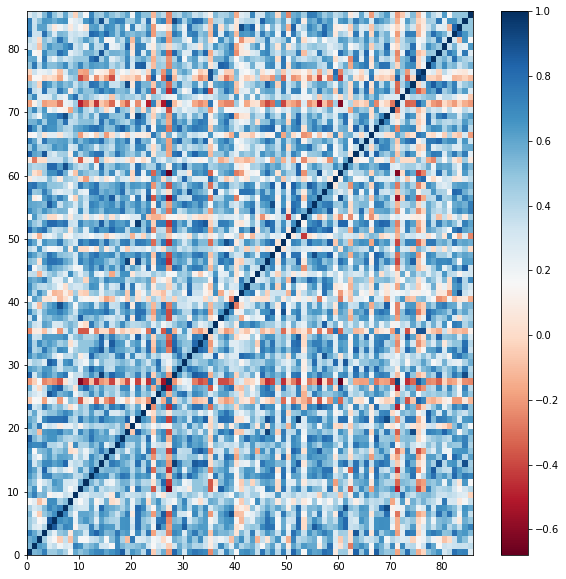

In [53]:
plt.figure(figsize=(10,10))
plt.pcolor(correlations, cmap=plt.cm.get_cmap('RdBu'))
plt.colorbar();
plt.ca

In [56]:
data = pd.Series([1,2,3,4])
data = data.iloc[[3,0,1,2]]
data = data.reset_index(drop=True)
data[0]

4